비지도 학습 : 머신러닝의 미래
- 입력데이터 x만 존재, 출력 y는 없음

In [1]:
# p221 10개의 숫자 이미지 OCR(optical character recognization)
# 비지도학습으로 숫자 인식을 할 수 있음

In [67]:
#221
from sklearn.datasets import load_digits

In [68]:
digits = load_digits()

In [69]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [70]:
digits.target.shape

(1797,)

In [71]:
digits.images.shape

(1797, 8, 8)

In [72]:
import matplotlib.pyplot as plt

(<matplotlib.image.AxesImage at 0x1fb6b62d4a8>,
 <matplotlib.image.AxesImage at 0x1fb6b62d7b8>)

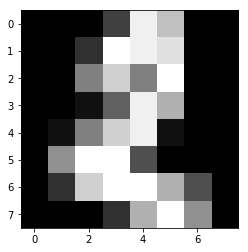

In [73]:
plt.imshow(digits.images[1]), plt.imshow(digits.images[2],cmap='gray')

In [74]:
#221 64개의 명암값을 2개로 차원축소해서, 2차원 그래프에 산점도로 그려본니다.

In [75]:
from sklearn.decomposition import PCA
import mglearn

In [76]:
pca = PCA(n_components=2).fit(digits.data) #64차원을 2차원으로 축소

In [77]:
pca_x = pca.transform(digits.data)

In [78]:
digits.data.shape, pca_x.shape

((1797, 64), (1797, 2))

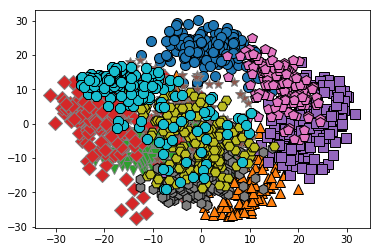

In [79]:
mglearn.discrete_scatter(pca_x[:,0], pca_x[:,1], digits.target)

In [80]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [81]:
#223
from sklearn.manifold import TSNE

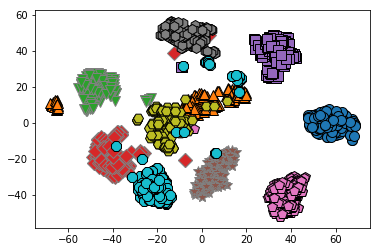

In [39]:
digits_tsne = TSNE().fit_transform(digits.data)
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], digits.target)

#p225 군집 (clustering) - 분류, 이상치 검출(abnormal detection)
- k-평균 군집
- 병합 군집
- DBSCAN(Density based spatial clustering) 밀도가 높은 공간

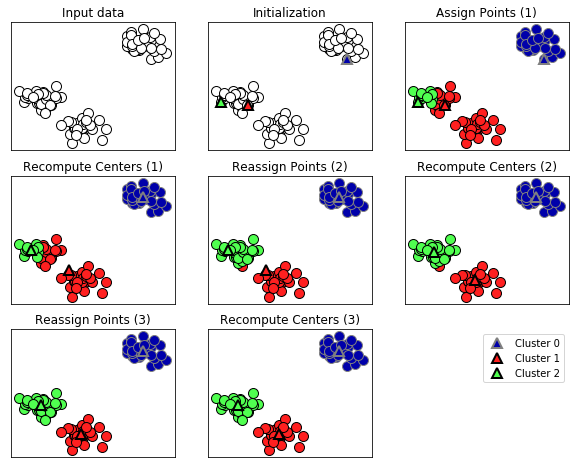

In [42]:
mglearn.plots.plot_kmeans_algorithm()

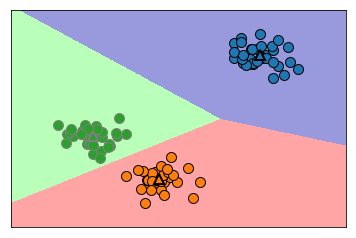

In [43]:
mglearn.plots.plot_kmeans_boundaries()

In [54]:
from sklearn.datasets import make_blobs
x, y = make_blobs()
x.shape, y.shape

((100, 2), (100,))

In [55]:
from sklearn.cluster import KMeans

In [62]:
km = KMeans(n_clusters=10).fit(x) #x를 3개로 그룹화

In [63]:
km.predict(x) #x 그룹 예측

array([8, 7, 6, 0, 7, 2, 0, 9, 9, 6, 8, 3, 4, 6, 2, 3, 3, 9, 5, 6, 7, 0,
       7, 7, 5, 6, 7, 9, 2, 6, 2, 3, 2, 5, 2, 5, 4, 7, 7, 9, 4, 5, 2, 2,
       5, 8, 2, 6, 0, 3, 6, 0, 0, 0, 3, 0, 3, 6, 9, 2, 4, 4, 9, 0, 2, 6,
       0, 0, 6, 2, 7, 7, 2, 0, 2, 1, 0, 4, 1, 3, 3, 7, 6, 6, 1, 6, 8, 2,
       4, 0, 6, 6, 5, 9, 0, 9, 4, 1, 6, 0])

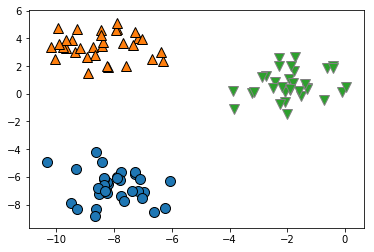

In [64]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], y)

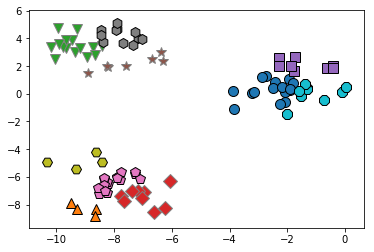

In [65]:
l = mglearn.discrete_scatter(x[:,0], x[:,1], km.predict(x))

In [60]:
y

array([0, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       1, 1, 1, 0, 1, 2, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1,
       1, 0, 1, 0, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 1, 0,
       2, 2, 0, 1, 1, 1, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       2, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2])

In [61]:
km.predict(x)

array([1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 1, 1, 0, 1, 2, 1, 1, 0, 2, 1, 2, 0,
       2, 2, 2, 1, 2, 0, 2, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       2, 1, 2, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 1,
       0, 0, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2,
       0, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 0])

digits에 적용
- t-SNE로 2개의 차원으로 축소
- 그 데이터로 k-Means를 fit(k=10)
- k-Means 예측 산점도로 표시

In [88]:
digits = load_digits()
digits_tsne = TSNE().fit_transform(digits.data)

In [89]:
km = KMeans(n_clusters=10).fit(digits_tsne)

In [90]:
predict_group = km.predict(digits_tsne)

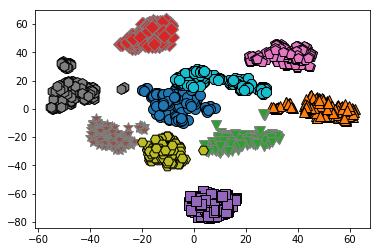

In [91]:
l = mglearn.discrete_scatter(digits_tsne[:,0], digits_tsne[:,1], predict_group)

한국 프로야구 10개팀 클러스터링

In [109]:
import pandas as pd
url = 'KBReport _ 한국 프로야구 통계 사이트.html'
tables = pd.read_html(url)
len(tables)

7

In [110]:
for t in tables:
    print(t.shape)

(10, 10)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)
(10, 3)


In [111]:
baseball = tables[0]
baseball

,순위,팀명,승,무,패,승률,게임차,득점,실점,연속
0,1,SK,59,1,29,0.670,0.0,441,342,2패
1,2,두산,54,0,36,0.600,6.0,440,346,2승
2,3,Hero,54,0,37,0.593,6.5,500,387,4승
3,4,LG,49,1,38,0.563,9.5,377,377,1패
4,5,NC,42,1,44,0.488,16.0,409,415,2패
5,6,KT,42,1,47,0.472,17.5,407,456,1패
6,7,삼성,37,1,49,0.430,21.0,400,424,2승
7,8,KIA,36,1,52,0.409,23.0,401,467,2패
8,9,한화,34,0,53,0.391,24.5,388,449,1승
9,10,롯데,32,2,54,0.372,26.0,407,507,1승


In [112]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
순위     10 non-null int64
팀명     10 non-null object
승      10 non-null int64
무      10 non-null int64
패      10 non-null int64
승률     10 non-null float64
게임차    10 non-null float64
득점     10 non-null int64
실점     10 non-null int64
연속     10 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 880.0+ bytes


In [113]:
baseball.set_index('팀명', inplace=True)

In [114]:
baseball

,순위,승,무,패,승률,게임차,득점,실점,연속
팀명,,,,,,,,,
SK,1,59,1,29,0.670,0.0,441,342,2패
두산,2,54,0,36,0.600,6.0,440,346,2승
Hero,3,54,0,37,0.593,6.5,500,387,4승
LG,4,49,1,38,0.563,9.5,377,377,1패
NC,5,42,1,44,0.488,16.0,409,415,2패
KT,6,42,1,47,0.472,17.5,407,456,1패
삼성,7,37,1,49,0.430,21.0,400,424,2승
KIA,8,36,1,52,0.409,23.0,401,467,2패
한화,9,34,0,53,0.391,24.5,388,449,1승


In [124]:
data = baseball.drop(columns='연속')
data.shape

(10, 8)

In [125]:
# 2차원으로 변환 후
from sklearn.decomposition import PCA

In [128]:
pca = PCA(n_components=2).fit(data)

In [129]:
data_pca = pca.transform(data)
data_pca.shape

(10, 2)

In [134]:
# k-Means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
group = km.predict(data_pca)

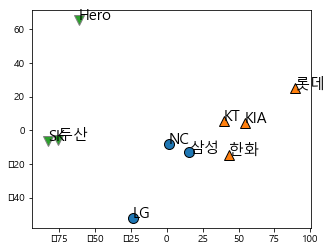

In [137]:
plt.rc('font', family='Malgun Gothic')
plt.figure(figsize=(5, 4))
plt.xlim(data_pca[:,0].min(), data_pca[:,0].max()+1)
plt.ylim(data_pca[:,1].min(), data_pca[:,1].max()+1)
for i in range(len(data_pca)):
    plt.text(data_pca[i,0], data_pca[i,1], data.index[i], fontdict={'size':15})
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], km.predict(data_pca))

와인데이터 - 와인의 특성으로 원산지 알아내기

In [139]:
wine = pd.read_csv('wine.data', header=None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [141]:
wine.columns = ['Country','Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
wine.head()

,Country,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [142]:
wine_property = wine.iloc[:,1:]
wine_country = wine.iloc[:, 0]

In [143]:
# 2차원으로 변환
pca = PCA(n_components=2).fit(wine_property)

In [146]:
data_pca = pca.transform(wine_property)

In [147]:
data_pca.shape

(178, 2)

In [149]:
# k-Means로 클러스터링
km = KMeans(n_clusters=3).fit(data_pca)
country = km.predict(data_pca)

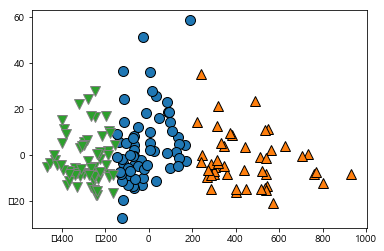

In [152]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], country)

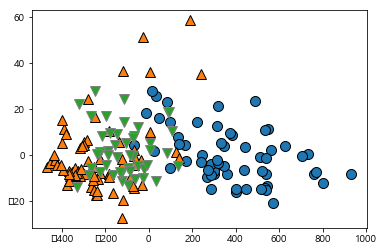

In [153]:
l = mglearn.discrete_scatter(data_pca[:,0], data_pca[:,1], wine_country)

대출

In [183]:
loans = pd.read_csv('loans.csv')
loans.shape

(9578, 14)

In [184]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9549 non-null float64
revol.bal            9578 non-null int64
revol.util           9516 non-null float64
inq.last.6mths       9549 non-null float64
delinq.2yrs          9549 non-null float64
pub.rec              9549 non-null float64
not.fully.paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [185]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [186]:
# get_dummpies 로 purpose 원핫코딩
loans = loans.dropna()
loans_hot = pd.get_dummies(loans)

In [187]:
# pca로 2차원 축소
pca = PCA(n_components=2).fit(loans_hot)
x_pca = pca.transform(loans_hot)

In [188]:
# k-means로 2개로 그룹화
km = KMeans(n_clusters=1).fit(x_pca)
group = km.predict(x_pca)

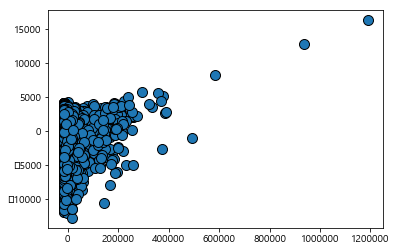

In [189]:
# 산점도로 출력 - 예측
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], group)

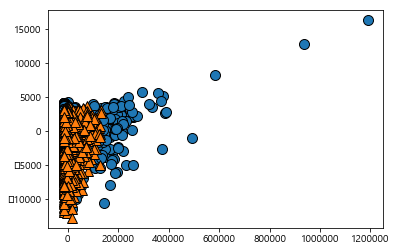

In [190]:
# 산점도로 출력 - 실제로 돈을 안갚은 사람들
l = mglearn.discrete_scatter(x_pca[:,0], x_pca[:,1], loans['credit.policy'])